Домашняя работа.
Метод Нелдера-Мида.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def func(X):
    x = X[0]
    y = X[1]
    return np.sin(y) * np.exp((1 - np.cos(x)) ** 2) + np.cos(y) * np.exp((1 - np.sin(y)) ** 2) + (x - y) ** 2


In [195]:
def nelder_mid(func, dim, alpha=1, beta=0.5, gamma=2, break_point = 1e-6, need_counter = False, start_point=[None, None]):
    #Init
    if np.sum(start_point == None) > 0:
        points = np.append(np.eye(dim), np.zeros(dim)).reshape(dim + 1, dim)
    else:
        points = np.append(np.eye(dim) + start_point, start_point).reshape(dim + 1, dim)
    # 0 step
    values = np.apply_along_axis(func, arr=points, axis = 1)
    counter = 0
    while(True):
        counter += 1
        if np.sum(np.var(points, axis=0) > break_point) == 0:
            if need_counter:
                print(f"Total iterations: {counter}")
            return np.sum(points, axis = 0) / (dim + 1)
        #print(f"Points in a array: {len(points)}")
        min_index = np.argmin(values)
        min_value = values[min_index] #f_l
        min_point = points[min_index] #f_l
    
        max_index = np.argmax(values)
        max_value = values[max_index] #f_h
        max_point = points[max_index] #x_h
    
        values = np.delete(values, max_index)
        points = np.delete(points, max_index, axis = 0)
        #print(points)
        max2_index = np.argmax(values)
        max2_value = values[max2_index] #f_g
        max2_point = points[max2_index] #x_g
        
        mass_center = np.sum(points, axis = 0) / dim #x_c
        
        reflected_point = (1 + alpha) * mass_center - alpha * max_point #x_r
        #print("Reflected point")
        #print(reflected_point)
        ref_value = func(reflected_point) #f_r
        
        if ref_value < min_value:
            corrected_point = (1 - gamma) * mass_center + gamma * reflected_point # x_e
            corrected_value = func(corrected_point) #f_e
            
            if corrected_value < ref_value: #add x_e
                #print(f"Add x_e, iteration: {counter}")
                values = np.append(values, corrected_value)
                points = np.append(points, corrected_point).reshape(-1, dim)
                continue
                
            if corrected_value > ref_value: #add x_r
                #print(f"Add x_r, iteration: {counter}")
                values = np.append(values, ref_value)
                points = np.append(points, reflected_point).reshape(-1, dim)
                continue
                
        if min_value < ref_value and ref_value < max2_value: #add x_r
            #print(f"Add x_r, iteration: {counter}")
            values = np.append(values, ref_value)
            points = np.append(points, reflected_point).reshape(-1, dim)
            continue
            
        if max2_value < ref_value and ref_value < max_value: #swap x_r and x_h
            tmp_val = ref_value
            tmp_point = reflected_point
            ref_value = max_value
            reflected_point = max_point
            max_value = tmp_val
            max_point = tmp_point
            
        compressed_point = beta * max_point + (1 - beta) * mass_center
        compressed_value = func(compressed_point)
        
        if compressed_value < max_value: #add x_c
            #print(f"Add x_c, iteration: {counter}")
            values = np.append(values, compressed_value)
            #print(points)
            #print(f"Compressed point, {compressed_point}")
            points = np.append(points, compressed_point).reshape(-1, dim)
            continue
        
        #print(f"Add x_h, iteration: {counter}")
        values = np.append(values, max_value)
        points = np.append(points, max_point).reshape(-1, dim)
        
        min_index = np.argmin(values)
        #print(points)
        points = (points - min_point) / 2 + min_point
        #print(points)
        points[min_index] = min_point

In [156]:
nelder_mid(func, 2)

array([0.7664206 , 0.93504618])

In [149]:
def square(X):
    return X[0] ** 2 + X[1] ** 2 + X[2] ** 2

res = nelder_mid(square, 3, break_point=1e-30)
square(res)


1.7419036742977686e-30

Видим, что метод работает. Покажем зависимость от гиперпараметров и от начальной точки

In [161]:
points_alpha = []
points_betas = []
points_gammas = []


betas = np.arange(0.5 , 10, 0.01)
gammas = np.arange(0.5 , 10, 0.01)
alphas = np.arange(0.5 , 10, 0.01)

for beta in betas:
    points_betas.append(nelder_mid(func, 2, beta=beta))
    
for gamma in gammas:
    points_gammas.append(nelder_mid(func, 2, gamma=gamma))
    
for alpha in alphas:
    points_alpha.append(nelder_mid(func, 2, alpha=alpha))
    

In [173]:
points_alpha

[array([0.36988464, 0.70959633]),
 array([0.46378379, 0.76259932]),
 array([0.5934684 , 0.83318508]),
 array([0.75997437, 0.92158895]),
 array([0.73091973, 0.85828218]),
 array([0.76531999, 0.93169827]),
 array([0.76493104, 0.93480525]),
 array([0.76693444, 0.93475687]),
 array([0.76576361, 0.93416244]),
 array([0.76731221, 0.93419617]),
 array([0.76645681, 0.93396667]),
 array([0.76570206, 0.93367099]),
 array([0.76547741, 0.93395595]),
 array([0.76551444, 0.93468006]),
 array([0.76550327, 0.93390672]),
 array([0.76614767, 0.93485094]),
 array([0.76621122, 0.93477209]),
 array([0.766155  , 0.93437358]),
 array([0.76640032, 0.9354506 ]),
 array([0.76491502, 0.93344514]),
 array([0.76700324, 0.93533953]),
 array([0.76751303, 0.93614479]),
 array([0.76599487, 0.93472471]),
 array([0.76644345, 0.93519422]),
 array([0.7666981 , 0.93568226]),
 array([0.76711871, 0.93603869]),
 array([0.76613579, 0.93460723]),
 array([0.76633389, 0.93464063]),
 array([0.76600646, 0.93514146]),
 array([0.7657

In [182]:
def graph_points(param, grid, param_name):
    X = np.asarray(param).T[0]
    Y = np.asarray(param).T[1]
    plt.figure(figsize=(15, 10))
    plt.plot(grid, X, color = 'r')
    plt.plot(grid, Y, color = 'b')
    plt.ylabel("Point")
    plt.xlabel(param_name)
    plt.legend([ "X", "Y"])
    plt.title("График изменения координат от параметра " + param_name)

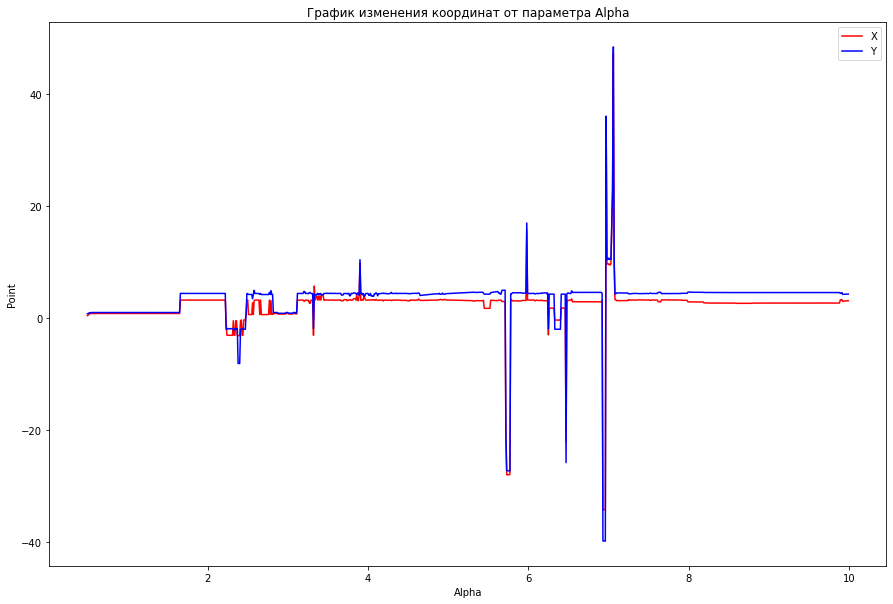

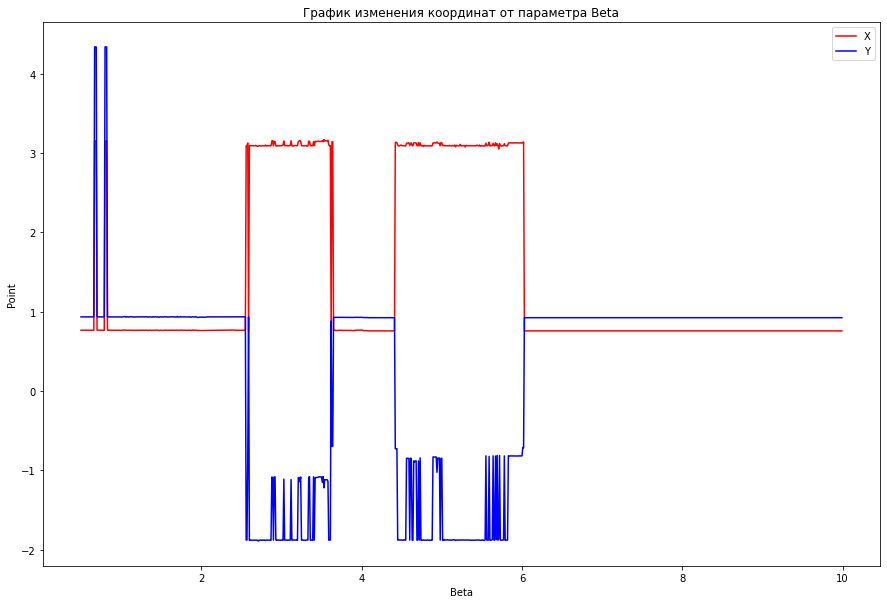

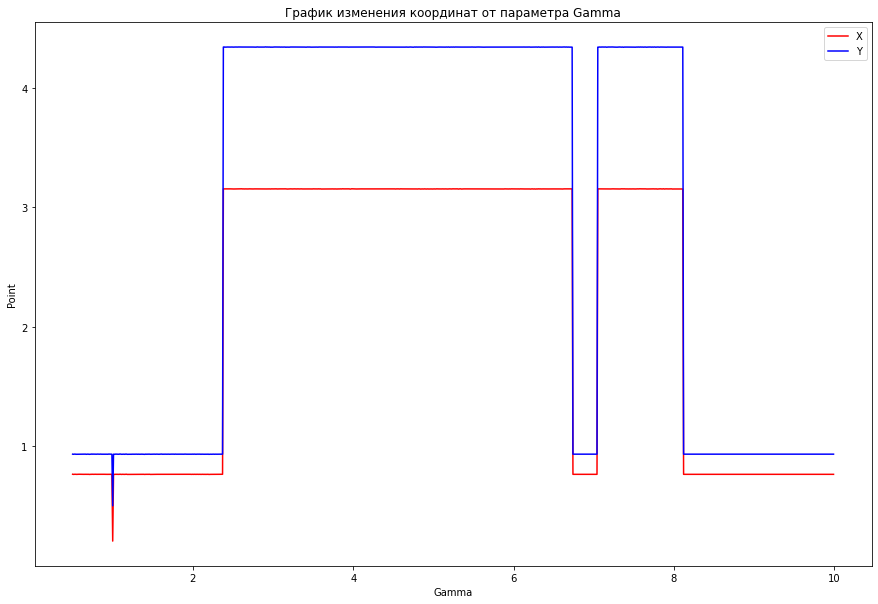

In [183]:
graph_points(points_alpha, alphas, "Alpha")
graph_points(points_betas, betas, "Beta")
graph_points(points_gammas, gammas, "Gamma")

Как мы видим при изменении параметра альфа разброс существеннен и доходит до 40.
В других случаях разброс меньше и мы получем разброс в пределах 4.

***Вывод:***

Гиперпараметры очень сильно влияют на исходные точки

Посмотрим зависимость от начальной точки.

In [197]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
points = np.dstack(np.meshgrid(x, y)).reshape(-1, 2)
res = []


In [199]:
points

array([[-10.        , -10.        ],
       [ -9.31034483, -10.        ],
       [ -8.62068966, -10.        ],
       ...,
       [  8.62068966,  10.        ],
       [  9.31034483,  10.        ],
       [ 10.        ,  10.        ]])

In [198]:
for point in points:
    res.append(nelder_mid(func, 2, start_point=point))

In [200]:
res

[array([-9.41238673, -8.22583983]),
 array([-9.4133579 , -8.22611744]),
 array([-9.41295397, -8.2266436 ]),
 array([-9.41360596, -8.22733885]),
 array([-9.41317068, -8.22705462]),
 array([-9.41291484, -8.22619034]),
 array([-9.41331478, -8.22650577]),
 array([-9.41300672, -8.2260311 ]),
 array([-9.41289455, -8.22664648]),
 array([-9.41330029, -8.2266786 ]),
 array([-3.18982069, -8.16424503]),
 array([-9.41252279, -8.22597426]),
 array([-3.18933413, -8.16531915]),
 array([-3.19012378, -8.1646192 ]),
 array([-3.18970147, -8.16431459]),
 array([-3.18980488, -8.16446685]),
 array([-3.1895702 , -8.16471935]),
 array([-5.51665231, -5.34828882]),
 array([-3.18981114, -8.16474122]),
 array([-3.18987266, -8.1651047 ]),
 array([-5.51679591, -5.34880747]),
 array([-9.34881264, -2.0099993 ]),
 array([-3.18907143, -8.16376955]),
 array([-3.12976551, -1.94354988]),
 array([-3.1304288 , -1.94349521]),
 array([-3.129538  , -1.94394517]),
 array([-3.12982288, -1.94371566]),
 array([-3.12995443, -1.9436

Text(0.5, 1.0, 'Разброс точек к которым сходится алгоритм')

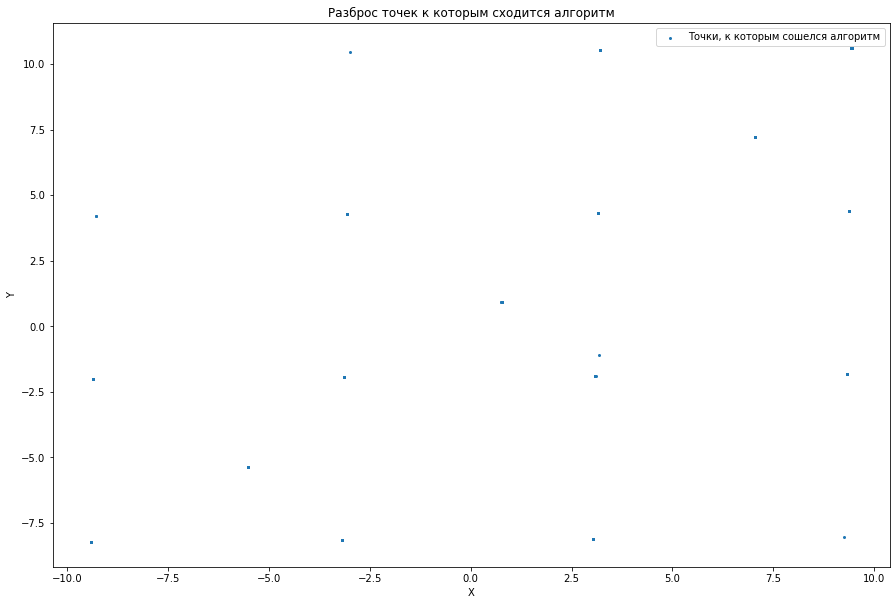

In [205]:
plt.figure(figsize=(15, 10))
X = np.asarray(res).T[0]
Y = np.asarray(res).T[1]
plt.scatter(X, Y, s = 4)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(["Точки, к которым сошелся алгоритм"])
plt.title("Разброс точек к которым сходится алгоритм")

Как мы можем заметить при разных значениях начальной точки алгоритм сходится к разным точкам.
Но их не так много(при близких начальных точках алгоритм все же сойдется к одной и той же точке)